## Observations and Insights 

The mouse weight, and average tumor volume is 0.84. This is positive and close to 1, meaning that as the mouse weight increases the average tumor volume also increases.
Capomulin seems to reduce the size of the tumor more effectively than the other drugs. It also has a better survival rate. 



In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
combined.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [123]:
# Checking the number of mice.
len(combined["Mouse ID"].value_counts())


249

In [124]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

drop_mouse = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
clean_combined = combined[combined['Mouse ID'].isin(drop_mouse)==False]

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
sorted_combined = clean_combined.sort_values("Timepoint", ascending= True) 
final_sorted = sorted_combined.reset_index()
del final_sorted['index']
final_sorted.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,n678,Propriva,Male,5,29,0,45.0,0
2,n763,Placebo,Female,16,25,0,45.0,0
3,v923,Capomulin,Female,19,21,0,45.0,0
4,w150,Capomulin,Male,23,23,0,45.0,0


In [125]:
# Checking the number of mice in the clean DataFrame.
len(final_sorted["Mouse ID"].value_counts())

248

## Summary Statistics

In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = final_sorted.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = final_sorted.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = final_sorted.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = final_sorted.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = final_sorted.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
single_summary = final_sorted.groupby('Drug Regimen')
summary2 = single_summary.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

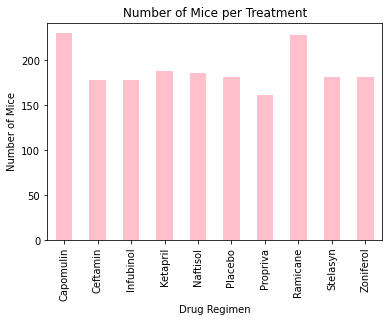

In [128]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

micevstreat = combined.groupby(["Drug Regimen"]).count()["Mouse ID"]
panda_plot = micevstreat.plot(kind="bar", color='pink', title = "Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

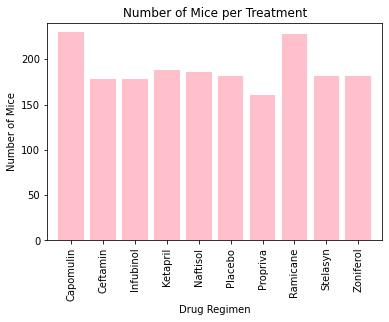

In [129]:
#Change the groupby to a list in order to plot the data
micelist =(combined.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
micelist

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(micevstreat))
plt.bar(x_axis, micelist, color='pink', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(micelist)+10)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

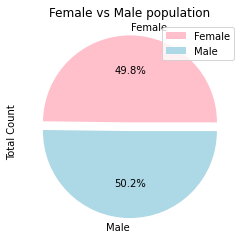

In [130]:
#Easiest to do by making a dataframe grouping both Sex and ID and total/percentage
groupgender = combined.groupby(["Mouse ID","Sex"])
groupgender
gender = pd.DataFrame(groupgender.size())
mousegender = pd.DataFrame(gender.groupby(["Sex"]).count())
mousegender.columns = ["Total Count"]
mousegender["Percentage of Sex"] = (100*(mousegender["Total Count"]/mousegender["Total Count"].sum()))
mousegender["Percentage of Sex"] = mousegender["Percentage of Sex"]
mousegender

# Generate a pie plot showing the distribution of female versus male mice using pandas

pandaplotpie = mousegender.plot(kind="pie", y="Total Count", colors=["pink", "lightblue"],  explode = (0.1, 0), autopct="%1.1f%%", title = "Female vs Male population")
pandaplotpie


plt.show()

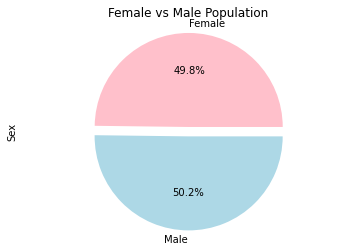

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.8,50.2]
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=['pink', 'lightblue'], explode=explode, autopct="%1.1f%%")
plt.title('Female vs Male Population')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [132]:
# Put treatments into a list for for loop (and later for plot labels)

tlist = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tvlist = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volume    
capomulind = combined.loc[combined["Drug Regimen"] == "Capomulin",:]
ramicaned = combined.loc[combined["Drug Regimen"] == "Ramicane", :]
infubinold = combined.loc[combined["Drug Regimen"] == "Infubinol", :]
ceftamind = combined.loc[combined["Drug Regimen"] == "Ceftamin", :]

# Capomulin dataframe
capomulin = capomulind.groupby('Mouse ID').max()['Timepoint']
volcapomulin = pd.DataFrame(capomulin)
capomulin = pd.merge(volcapomulin, combined, on=("Mouse ID","Timepoint"),how="left")

#Ramicane dataframe
ramicane = ramicaned.groupby('Mouse ID').max()['Timepoint']
volramicane = pd.DataFrame(ramicane)
ramicane = pd.merge(volramicane, combined, on=("Mouse ID","Timepoint"),how="left")

#Infubinol dataframe
infubinol = infubinold.groupby('Mouse ID').max()['Timepoint']
volinfubinol = pd.DataFrame(infubinol)
infubinol = pd.merge(volinfubinol, combined, on=("Mouse ID","Timepoint"),how="left")

#Ceftamin dataframe
ceftamin = ceftamind.groupby('Mouse ID').max()['Timepoint']
volceftamin = pd.DataFrame(ceftamin)
ceftamin = pd.merge(volceftamin, combined, on=("Mouse ID","Timepoint"),how="left")

# add subset 
# Determine outliers using upper and lower bounds
#Capomulin IQR
capbox = capomulin["Tumor Volume (mm3)"]
quartiles = capbox.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


#Ramicane IQR
rabox = ramicane["Tumor Volume (mm3)"]
quartiles = rabox.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(" ")
print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



#Infubinol IQR
ifbox = infubinol["Tumor Volume (mm3)"]
quartiles = ifbox.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(" ")
print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


#Ceftamin IQR
cefbox = ceftamin["Tumor Volume (mm3)"]
quartiles = cefbox.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(" ")
print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 
The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 
The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
 
The lower quartile of Ceftamin tumors: 48.72207785
The upper quart

In [133]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

bestr = combined.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
bestr.head()

# Turn retrieved data into dataframe to easily manipulate
bestr= bestr.to_frame()
bestr




Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Zoniferol    q633               70.827796
             s337               62.109651
             w140               47.717952
             w575               68.401286
             x613               48.077646

[249 rows x 1 columns]

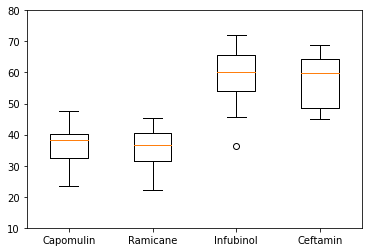

In [134]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bestr = bestr.reset_index()
tumorlist = bestr.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumorlist = pd.DataFrame(tumorlist)
tumorlist= tumorlist.reindex(tlist)
tumorvol = [vol for vol in tumorlist['Tumor Volume (mm3)']]
plt.boxplot(tumorvol, labels=tlist)
plt.ylim(10, 80)
plt.show()




## Line and Scatter Plots

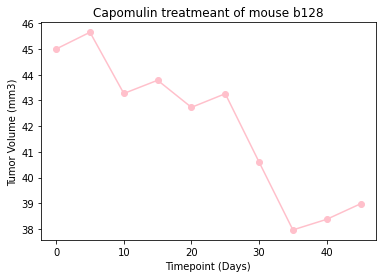

In [135]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line = capomulind.loc[capomulind["Mouse ID"] == "b128",:]
line.head()
x_axis = line["Timepoint"]
tumsize = line["Tumor Volume (mm3)"]
plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis, tumsize,marker="o",color="pink")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


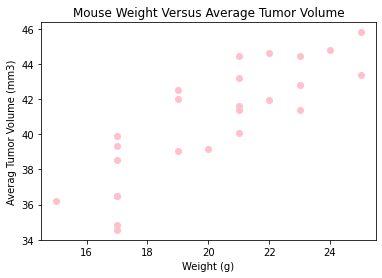

In [136]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatdata =capomulind.groupby(['Mouse ID']).mean()
plt.scatter(scatdata['Weight (g)'], scatdata['Tumor Volume (mm3)'], color="pink")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [139]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(scatdata['Weight (g)'],scatdata['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

x_values = scatdata['Weight (g)']
y_values = scatdata['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

The correlation between mouse weight and average tumor volume is 0.84
slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55
